## 数据探索与分析

- 导入数据
- 数据类型分析 
      1 数值，字符串类型
- 无关特征删除
      1 类别特征
            1 unique=1 ， 删除
            2 unique=all ，查看是否包含其他有用信息
            3 unique=部分，找出占比例较大的类。查看是否有用
      2 数值特征   
            1 数值特征 unique=1 删除（有时候ID也包含了信息） 
            2 数值特征 unique = all 进行分段，查看与标签值的关系，该特征或许包含其他信息
            3 如果特征是个索引，或者递增的序列，一般无用，删除
- 数据类型转换
       1 将类别特征的字符串转化为数值。如果特征有距离属性采用自然数编码，没有距离属性，可以用one-hot
       2 将日期（年、天数）也可以转化成数值。
- 缺失值处理
      1 缺失比例>10%，转换成one-hot编码
      2 缺失比例<1% ,用众数或平均数填补 
               1 unique>10 用平均数
               2 unique<10 用众数
      3 缺失比例1%-10%，用随机森林预测填充
      4 时间的缺失,看缺失值的比例，可以先将时间解析成固定格式，最后再转化原来的格式
- 检查是否还存在缺失值

## 数据集划分


## 特征选择、衍生
- IV值
- 特征重要性：随机森林、lasso、线性回归、XGB等模型 
- 相关系数corr
- 特征衍生：多项式

## 特征数值化


## 模型构建
- LogisticRegression 、SVM、DecisionTreeClassifier、RandomForest、XGB
- 评分方式 准确率
- 可以用交叉验证来构建

## 模型评估
- 记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
#关闭警告  
pd.set_option('mode.chained_assignment',None)

In [4]:
matplotlib.rcParams['font.sans-serif'] = ['FangSong'] #指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#### 导入数据

In [5]:
data = pd.read_csv('data.csv',encoding = 'gb18030')

In [6]:
data.shape

(4754, 90)

In [7]:
data.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


#### 数据类型分析

In [8]:
data.info() 
#90列   4753行

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

 数值特征83个，字符串类型特征7个，多数值缺失值不是特别多。

In [9]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [10]:
data.describe(include='O') #非数值特征的属性7列

,trade_no,bank_card_no,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
count,4754,4754,4752,4754,4478,4450,4457
unique,4754,1,5,1,4309,207,232
top,20180507115009279000000388195256,卡号1,一线城市,xs,张龙,2018-04-14,2018-05-03
freq,1,4754,3403,4754,5,423,134


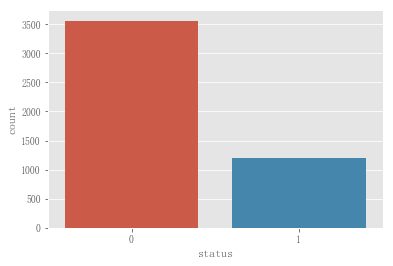

In [11]:
sns.countplot(data['status']) #查看目标值的比例

In [12]:
stats = []
#计算每一列的  列名  列包含多少类  列空的比例  列最多的元素所占比例  列类型
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
#   将缺失值 按照降序排列 
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,student_feature,2,63.062684,63.062684,float64
33,cross_consume_count_last_1_month,19,8.960875,64.535128,float64
58,latest_six_month_apply,65,6.394615,6.394615,float64
56,latest_one_month_apply,36,6.394615,17.522087,float64
55,latest_query_time,207,6.394615,8.897770,object
54,query_sum_count,74,6.394615,6.394615,float64
53,query_cash_count,17,6.394615,15.649979,float64
52,query_finance_count,25,6.394615,11.190576,float64
51,query_org_count,46,6.394615,6.394615,float64
50,apply_credibility,41,6.394615,11.022297,float64


#### 无关特征删除
- 类别特征   bank_card_no 和 source 的unique=1 删除

In [13]:
data.drop(['bank_card_no', 'source'], axis=1, inplace=True)

- trade-no

In [14]:
data['trade_no'].head(10)
data['trade_no'].tail(10)

4744    20180507115029481000000388194850
4745    20180507123619864000000388369012
4746    20180507125012243000000023109396
4747    20180507123811494000000388377504
4748    20180507121025853000000388266701
4749    20180507120519228000000388247328
4750    20180507114937914000000388192877
4751    20180507121340509000000388278785
4752    20180504161827128000000381357758
4753    20180507124243041000000388391027
Name: trade_no, dtype: object

In [15]:
def parse_trade_no(array):
    lst = [array[:4], array[4:6], array[6:8], array[-10:]]
    return lst

In [16]:
trade_no_data = pd.DataFrame(data['trade_no'].map(parse_trade_no).values.tolist(),columns=['tradeno_year', 'tradeno_month', 'tradeno_day', 'tradeno_id'])

In [17]:
trade_no_data.describe()

,tradeno_year,tradeno_month,tradeno_day,tradeno_id
count,4754,4754,4754,4754
unique,1,1,3,4754
top,2018,05,07,0388216266
freq,4754,4754,3682,1


trade_no 字段像个 id 字段，假设前 8 位是年月日信息，可以看出 trade_no 均是在 2018 年 5 月份，tradeno_id 各不相同，保留 tradeno_day，其他的信息删除。

In [18]:
data = pd.concat((data.drop('trade_no',axis=1),trade_no_data['tradeno_day']),axis=1)

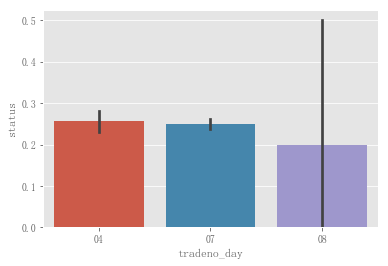

In [19]:
sns.barplot(data=data,x='tradeno_day',y = 'status') #柱状图比较数据的大小， 误差棒：标准差

- id__name 找出较多的人的名字, 查看下逾期率

In [20]:
idname_count = data['id_name'].value_counts()
idname_count  = idname_count[idname_count>3]
idn_df = data[data['id_name'].isin(idname_count.index)]

In [21]:
idn_df['id_name'].value_counts()

李杰    5
李明    5
张龙    5
李波    4
张伟    4
刘强    4
张超    4
陈鹏    4
陈波    4
Name: id_name, dtype: int64

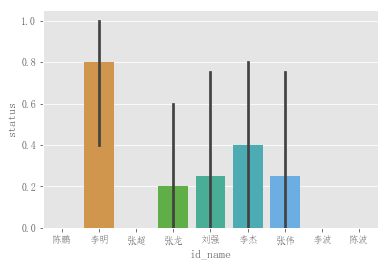

In [22]:
sns.barplot(data = idn_df, x = 'id_name',y = 'status')

In [23]:
data['is_LiMing'] = (data['id_name'] == '李明').apply(int)
data.drop('id_name',axis = 1,inplace = True)

### 数值特征

In [24]:
value_cols = data.describe().columns

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text xticklabel objects>)

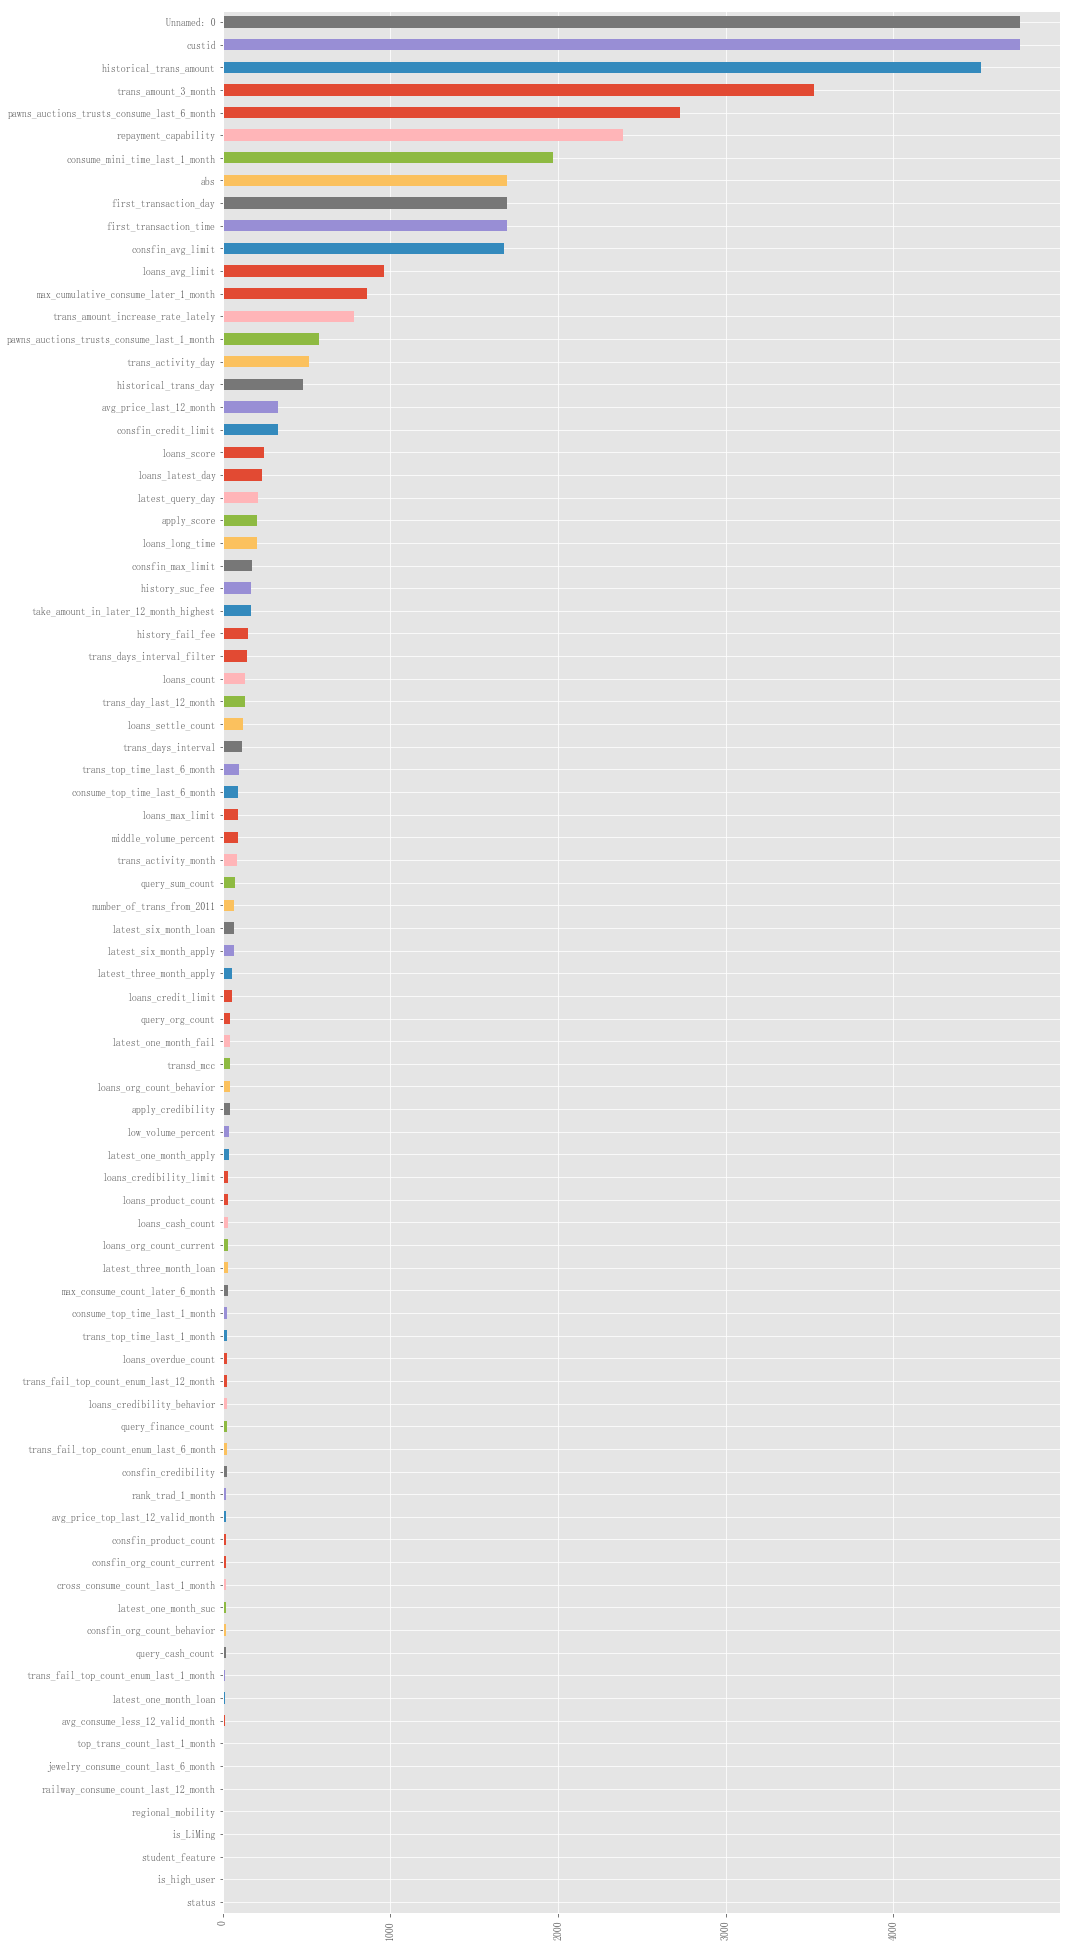

In [25]:
data[value_cols].nunique().sort_values().plot(kind = 'barh', figsize =(15,35))
plt.xticks(rotation = 90)

In [26]:
data[value_cols].columns[  data[value_cols].nunique()<10 ]

Index(['regional_mobility', 'student_feature', 'is_high_user',
       'top_trans_count_last_1_month', 'railway_consume_count_last_12_month',
       'jewelry_consume_count_last_6_month', 'status', 'is_LiMing'],
      dtype='object')

In [27]:
print('数值特征 unique < 10 个数：', len(data[value_cols].columns[data[value_cols].nunique()<10]))
print('数值特征 unique < 20 个数：', len(data[value_cols].columns[data[value_cols].nunique()<20]))
print('数值特征 unique < 30 个数：', len(data[value_cols].columns[data[value_cols].nunique()<30]))

数值特征 unique < 10 个数： 8
数值特征 unique < 20 个数： 16
数值特征 unique < 30 个数： 28


In [28]:
print('全部为 unique 的特征', data[value_cols].columns[data[value_cols].nunique()==len(data)])

全部为 unique 的特征 Index(['Unnamed: 0', 'custid'], dtype='object')


'Unnamed: 0', 'custid'，unique为所有样本即没没有相同值的情况，先不予删除。

#### custid
- custid 范围中 100~400W，如果假设注册越早，id 越小，看一下 id 大小与逾期率的关系。- 

In [29]:
np.logspace(1, 10, 7)

array([1.00000000e+01, 3.16227766e+02, 1.00000000e+04, 3.16227766e+05,
       1.00000000e+07, 3.16227766e+08, 1.00000000e+10])

In [30]:
custid_range = np.logspace(1, 7, 7)[1:]

In [31]:
df = data

In [32]:
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])

In [33]:
df['cust_id_bin'].value_counts()

1000000.0    3249
100000.0     1342
10000.0       149
1000.0         13
100.0           1
Name: cust_id_bin, dtype: int64

label 为 100 数据太少，并入 1000 中，1000000 之后再详细划分

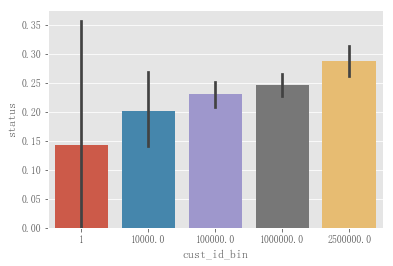

In [34]:
custid_range = [1, 1e4, 1e5, 1e6, 2.5e6, 5e6]
df['cust_id_bin'] = pd.cut(df['custid'], bins=custid_range, labels=[str(i) for i in custid_range][:-1])
sns.barplot(data=df, x='cust_id_bin', y='status')

正如猜想的一样，id 越小，逾期率越低，可能原因是越最近注册的，是新用户，紧急用钱，越可能逾期。先保留 id 这个特征。

#### Unnamed: 0    
diff()差分函数，diff()= df - df.shift()

In [35]:
sum(df['Unnamed: 0'].diff(1)>0)

4753

In [36]:
len(df)

4754

Unnamed: 0 这个特征数值是递增的，删除

In [37]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,tradeno_day,is_LiMing,cust_id_bin
0,2791858,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,07,0,2500000.0
1,534047,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,07,0,100000.0
2,2849787,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,07,0,2500000.0
3,1809708,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,07,0,1000000.0
4,2499829,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,07,0,1000000.0


In [38]:
data.head()

,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,...,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,tradeno_day,is_LiMing,cust_id_bin
0,2791858,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,...,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,07,0,2500000.0
1,534047,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,...,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,07,0,100000.0
2,2849787,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,...,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,07,0,2500000.0
3,1809708,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,...,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,07,0,1000000.0
4,2499829,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,...,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,07,0,1000000.0


In [39]:
len(df.describe().columns)

83

### 数据类型转换

In [40]:
df.describe(include='O')

,reg_preference_for_trad,latest_query_time,loans_latest_time,tradeno_day
count,4752,4450,4457,4754
unique,5,207,232,3
top,一线城市,2018-04-14,2018-05-03,07
freq,3403,423,134,3682


#### reg_preference_for_trad

In [41]:
df['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

城市之间存在大小差别，采用自然数编码

In [42]:
city_map = {'一线城市':1, '二线城市':2, '三线城市':3, '其他城市':0, '境外':5}

In [43]:
df['reg_preference_for_trad'] = df['reg_preference_for_trad'].map(city_map)

#### tradeno_day

In [44]:
df['tradeno_day'] = df['tradeno_day'].astype('int')

In [45]:

df.describe(include='O')

,latest_query_time,loans_latest_time
count,4450,4457
unique,207,232
top,2018-04-14,2018-05-03
freq,423,134


### 缺失值处理
- 缺失值大概分成大类，比例在 60%，5%~10%, 1% 左右

In [46]:
nan_prop = df.isnull().sum(axis = 0)[df.isnull().sum(axis = 0)!=0]/df.shape[0]*100

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text xticklabel objects>)

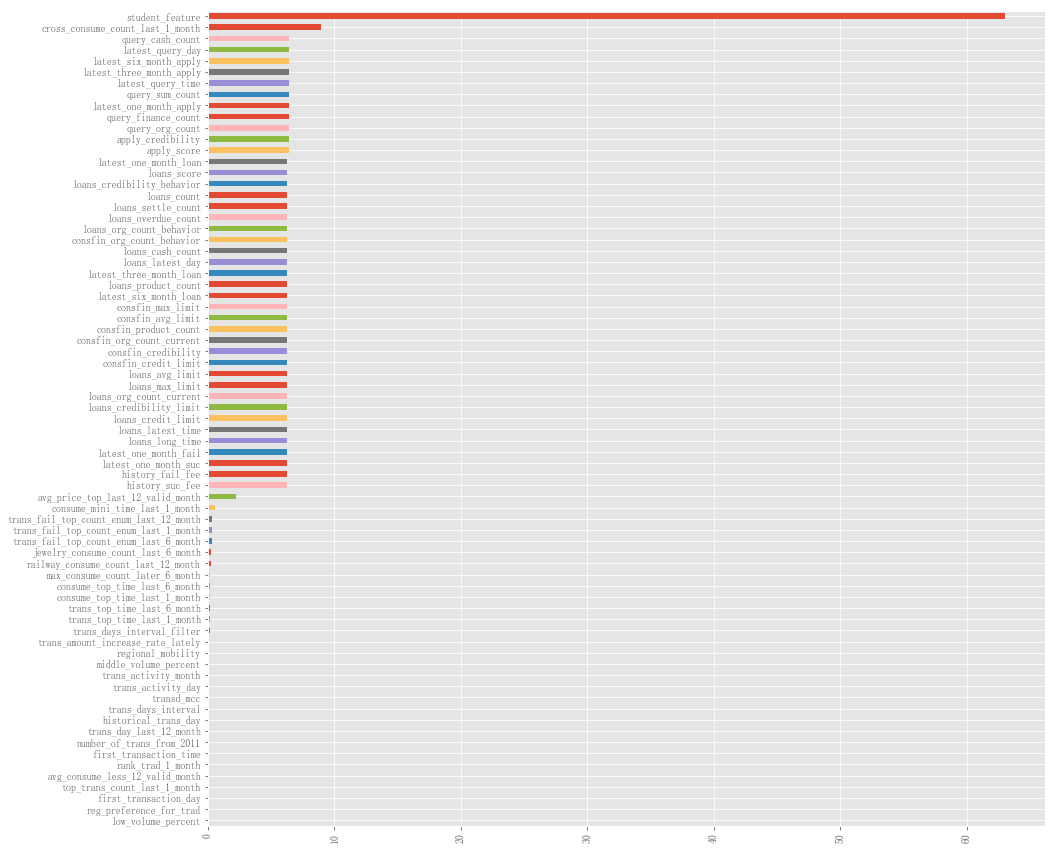

In [47]:
nan_prop.sort_values().plot(kind = 'barh', figsize =(15,15))
plt.xticks(rotation = 90)

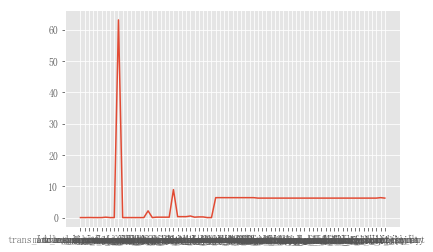

In [48]:
plt.plot(nan_prop)

####  缺失比例>10%
- 只有一列，转换成 one-hot 编码

In [49]:
nan100 = df[df.columns[df.isnull().sum(0)/df.shape[0]>0.1]]

In [50]:
nan100.columns

Index(['student_feature'], dtype='object')

In [51]:
nan100['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [52]:
# pd.get_dummies(nan100.fillna('NA'))

In [53]:
def parse_student_feature(array):
    lst = [0, 0, 0]
    if array == 1:
        lst[0] = 1
    elif array == 2:
        lst[1] = 1
    else:
        lst[2] = 1
    return lst

In [54]:
stu_featdf = pd.DataFrame(df['student_feature'].apply(parse_student_feature).values.tolist(
), columns=['student_feat_1', 'student_feat_2', 'student_feat_na'])

In [55]:
df = pd.concat((df.drop('student_feature', axis=1), stu_featdf), axis=1)

#### 缺失比例 < 1%
- 用众数或平均数填补

In [56]:
na1 = df[df.columns[(df.isnull().sum(0)/df.shape[0]<0.01)&(df.isnull().sum(0)/df.shape[0]>0)]]
na1.nunique()

low_volume_percent                           40
middle_volume_percent                        90
trans_amount_increase_rate_lately           782
trans_activity_month                         84
trans_activity_day                          512
transd_mcc                                   41
trans_days_interval_filter                  147
trans_days_interval                         114
regional_mobility                             5
number_of_trans_from_2011                    70
first_transaction_time                     1693
historical_trans_day                        476
rank_trad_1_month                            20
avg_consume_less_12_valid_month              12
top_trans_count_last_1_month                  8
reg_preference_for_trad                       5
trans_top_time_last_1_month                  28
trans_top_time_last_6_month                  97
consume_top_time_last_1_month                28
consume_top_time_last_6_month                94
trans_fail_top_count_enum_last_1_month  

In [57]:
na1.head()

,low_volume_percent,middle_volume_percent,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,number_of_trans_from_2011,...,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month
0,0.01,0.99,0.90,0.55,0.313,17.0,27.0,26.0,3.0,30.0,...,19.0,1.0,2.0,2.0,5.0,6.0,0.0,0.0,1738.0,85.0
1,0.02,0.94,1.28,1.00,0.458,19.0,30.0,14.0,4.0,23.0,...,30.0,0.0,3.0,3.0,330.0,9.0,0.0,0.0,779.0,84.0
2,0.04,0.96,1.00,1.00,0.114,13.0,68.0,22.0,1.0,9.0,...,68.0,3.0,6.0,6.0,0.0,3.0,0.0,0.0,338.0,95.0
3,0.00,0.96,0.13,0.57,0.777,22.0,14.0,6.0,3.0,33.0,...,8.0,1.0,8.0,8.0,31700.0,9.0,0.0,0.0,1831.0,82.0
4,0.01,0.99,0.46,1.00,0.175,13.0,66.0,42.0,1.0,12.0,...,66.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,435.0,88.0


In [58]:
na1.isnull().sum()

low_volume_percent                          2
middle_volume_percent                       2
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_day                        2
rank_trad_1_month                           2
avg_consume_less_12_valid_month             2
top_trans_count_last_1_month                2
reg_preference_for_trad                     2
trans_top_time_last_1_month                 8
trans_top_time_last_6_month                 8
consume_top_time_last_1_month               8
consume_top_time_last_6_month               8
trans_fail_top_count_enum_last_1_month     16
trans_fail_top_count_enum_last_6_m

In [59]:
print(df[df['trans_fail_top_count_enum_last_1_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_6_month'].isnull()].index)
print(df[df['trans_fail_top_count_enum_last_12_month'].isnull()].index)

Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')
Int64Index([1022, 1205, 1275, 1487, 1791, 1795, 1901, 2703, 2762, 3021, 3075,
            3740, 3856, 4228, 4500, 4647],
           dtype='int64')


trans_fail_top_count_enum_last_X_month 这几个特征在同一个位置信息都是缺失的。
从数据来看，12month count 数目大于 6month，大于 1month。
填充缺失值后注意检查一下。  
unique<10 的分类用众数，

unique>10 的用平均数填充

In [60]:
df[df['status']==1]['trans_fail_top_count_enum_last_1_month'].value_counts().index[0]

2.0

In [61]:
def parse_na1(dftmp):
    d = {}
    for i in dftmp.columns:
        if dftmp[i].nunique() < 10:
            status1 = dftmp[df['status']==1][i].value_counts().index[0]
            status0 = dftmp[df['status']==0][i].value_counts().index[0]
            d[i] = {'1':status1, '0':status0}
        elif dftmp[i].nunique() >= 10:
            status1 = int(dftmp[df['status']==1][i].dropna().mean())
            status0 = int(dftmp[df['status']==0][i].dropna().mean())
            d[i] = {'1':status1, '0':status0}
    return d

In [62]:
na1_values = parse_na1(na1)

In [63]:
for i in na1.columns:
    df.loc[(df[i].isnull()) & (df['status'] == 0), i] = na1_values[i]['0']
    df.loc[(df[i].isnull()) & (df['status'] == 1), i] = na1_values[i]['1']

In [64]:
data = df

#### 缺失比例 1%~10%
用随机森林预测填充这部分数据

In [65]:
na10 = df[df.columns[(df.isnull().sum(0)/df.shape[0] <= 0.1)
                     & (df.isnull().sum(0)/df.shape[0] >= 0.01)]]

In [66]:
def parse_time(s):
    try:
        #dt = time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
        dt = time.mktime(time.strptime(s,"%Y-%m-%d"))
    except:
        dt = np.nan
    return dt

In [67]:
na10['latest_query_time'] = na10['latest_query_time'].apply(parse_time)
na10['loans_latest_time'] = na10['loans_latest_time'].apply(parse_time)

In [68]:
def predict_nan(c):
#     c = 'consfin_avg_limit'
    nan_exist = df.loc[df[c].notnull()].drop(na10.columns, axis=1)# 选择不为空的那些列，   把含有空值的列剔除，相当于X
    y_nan = na10[c][na10[c].notnull()]#已知的不为空值 相当于Y
    nan_null = df.loc[df[c].isnull()].drop(na10.columns, axis=1) #未知的Y 所对应的X
    x = nan_exist.values
    y = y_nan.values
    rfr = RandomForestRegressor(n_estimators=100)
    rfr.fit(x, y)
    c_hat = rfr.predict(nan_null.values)
    c_hat = c_hat.astype(int)
    na10.loc[(na10[c].isnull()), c] = c_hat

In [69]:
for c in na10.columns:
    print('columns', c)
    predict_nan(c)

columns avg_price_top_last_12_valid_month
columns cross_consume_count_last_1_month
columns apply_score
columns apply_credibility
columns query_org_count
columns query_finance_count
columns query_cash_count
columns query_sum_count
columns latest_query_time
columns latest_one_month_apply
columns latest_three_month_apply
columns latest_six_month_apply
columns loans_score
columns loans_credibility_behavior
columns loans_count
columns loans_settle_count
columns loans_overdue_count
columns loans_org_count_behavior
columns consfin_org_count_behavior
columns loans_cash_count
columns latest_one_month_loan
columns latest_three_month_loan
columns latest_six_month_loan
columns history_suc_fee
columns history_fail_fee
columns latest_one_month_suc
columns latest_one_month_fail
columns loans_long_time
columns loans_latest_time
columns loans_credit_limit
columns loans_credibility_limit
columns loans_org_count_current
columns loans_product_count
columns loans_max_limit
columns loans_avg_limit
columns c

In [70]:

na10['loans_latest_time'] = pd.to_datetime(na10['loans_latest_time'], unit='s').dt.strftime('%Y-%m-%d')
na10['latest_query_time'] = pd.to_datetime(na10['latest_query_time'], unit='s').dt.strftime('%Y-%m-%d')

In [71]:
for i in na10.columns:
    df[i] = na10[i]

In [72]:
# 缺失值处理完毕
df.isnull().sum(axis=0)[df.isnull().sum(axis=0)!=0]/df.shape[0]

Series([], dtype: float64)

In [ ]:
data = df
TEM = df

#### loans_latest_time latest_query_time  first_transaction_time  三个时间特征给如何处理 
#### 还有一个cust_id_bin    category分类特征  cust_id也没有删除

####  还存在object的类型 和category  暂时删除不会处理的特征与cust_id特征

In [74]:
data = data.drop(['loans_latest_time','latest_query_time','first_transaction_time','custid'],axis = 1)

In [75]:
data = pd.get_dummies(data)

In [76]:
data.filter(regex='cust_id_bin')

,cust_id_bin_1,cust_id_bin_10000.0,cust_id_bin_100000.0,cust_id_bin_1000000.0,cust_id_bin_2500000.0
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,0,1
9,0,0,0,1,0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
low_volume_percent                            4754 non-null float64
middle_volume_percent                         4754 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4754 non-null float64
trans_activity_month                          4754 non-null float64
trans_activity_day                            4754 non-null float64
transd_mcc                                    4754 non-null float64
trans_days_interval_filter                    4754 non-null float64
trans_days_interval                           4754 non-null float64
regional_mobility                             4754 non-null float64
repayment_capability                          4754 non-null int64
is_high_user                                  4754 non-null int64
number_of_trans_from_2011                     4754 non-null float64
historical_tran

In [78]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动


#y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size
X_train.shape[0], X_test.shape[0], y_train.size, y_test.size

(3327, 1427, 3327, 1427)

## 特征工程
- 用IV和随机森林进行特征选择
- lasso回归进行特征选择
- 相关性分析

In [79]:
X_train.columns

Index(['low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'repayment_capability',
       'is_high_user', 'number_of_trans_from_2011', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       '

In [80]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train.columns)

In [82]:
FI_lasso.sort_values('Feature Importance',ascending = False)

,Feature Importance
trans_fail_top_count_enum_last_1_month,0.057156
top_trans_count_last_1_month,0.047487
rank_trad_1_month,0.036327
railway_consume_count_last_12_month,0.023997
cust_id_bin_2500000.0,0.017988
consfin_org_count_current,0.016746
loans_overdue_count,0.015799
latest_one_month_fail,0.011547
loans_product_count,0.009209
loans_count,0.007669


(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Text xticklabel objects>)

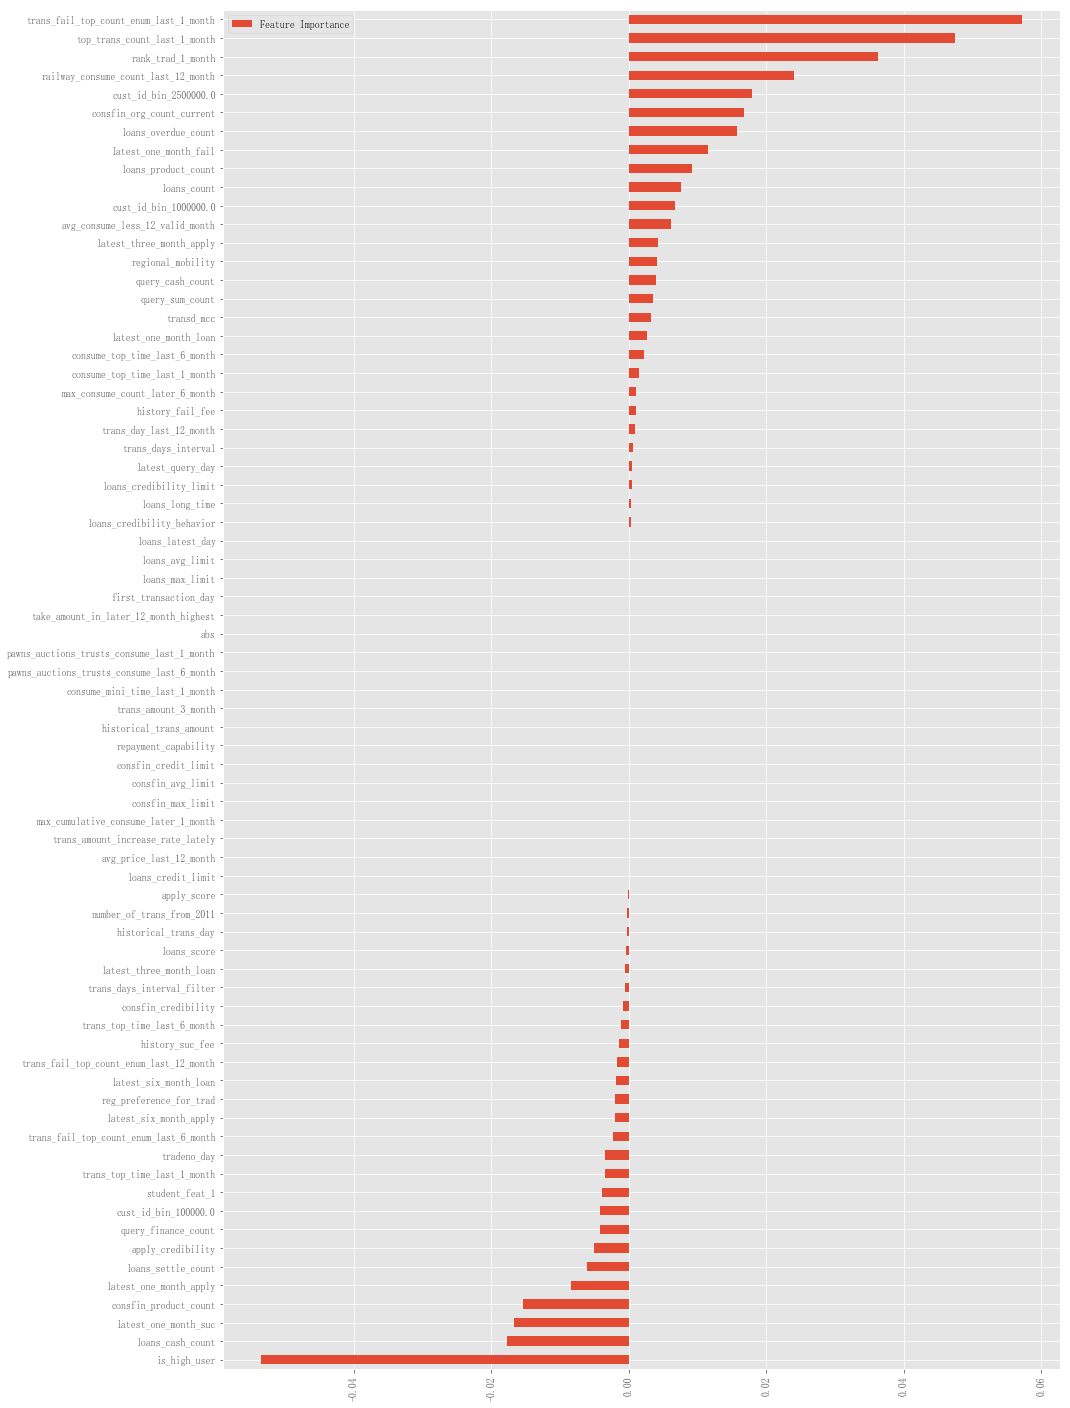

In [83]:
FI_lasso[FI_lasso['Feature Importance'] != 0].sort_values('Feature Importance').plot(kind = 'barh',figsize = (15,25))
plt.xticks(rotation = 90)

#### 相关性分析
- 暂时先放在这 ,似乎没有强相关性的特征

In [84]:
xy = pd.concat([X_train,y_train],axis=1)

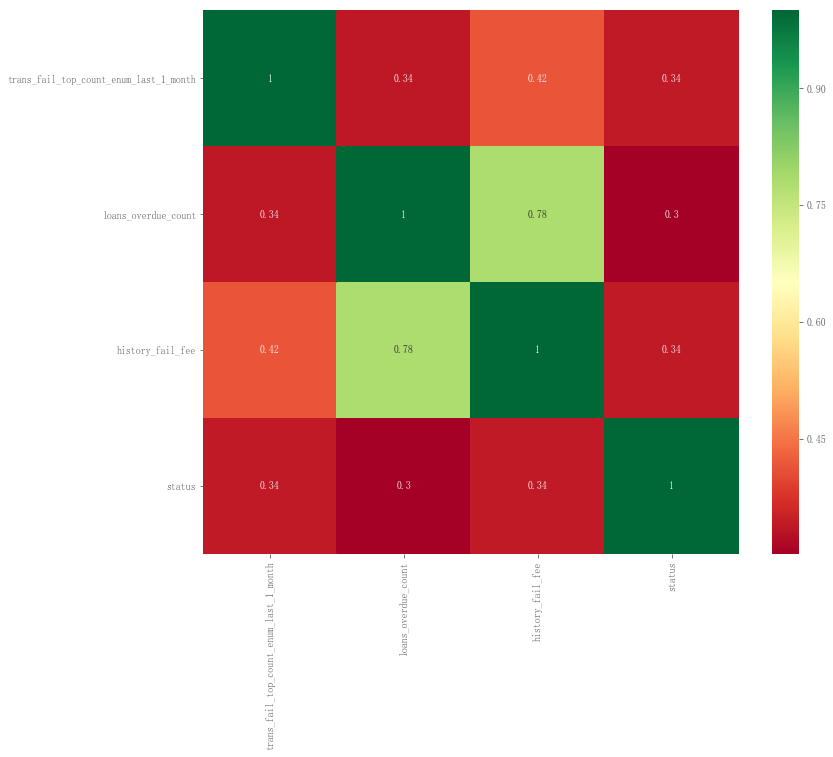

In [85]:
corrmat = xy.corr() #37*37
top_corr_features = corrmat.index[abs(corrmat['status'])>0.3]   #得到大于0.5的索引列 ['ID','AER','BsmtFinSF1']
#top_corr_features
plt.figure(figsize=(12,10))
g = sns.heatmap(xy[top_corr_features].corr(),annot=True, cmap='RdYlGn')

#### IV值

In [86]:
import math
import numpy as np
from scipy import stats
from sklearn.utils.multiclass import type_of_target

In [87]:
def woe(X,y,event=1):
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        #特征离散化
        if type_of_target(x) == 'continious':
            x = discrete(x)
        # 计算特征的woe和iv
        woe_dict, iv = woe_single_x(x,y,feature,event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict)
    return iv_dict

def discrete(x):
    #使用5等分离散化数据
    for i in range(5):
        point1 = stats.scoreatpercentile(x,i*20)
        point2 = stats.scoreatpercentile(x,(i+1)*20)
        x1 = x[np.where((x>=point1) & (x<point2 ))]
        mask = np.in1d(x,x1)
        res[mask] = i+1 
    return res

def woe_single_x(x, y, feature,event = 1):
    # event代表预测正例的标签
    event_total = sum(y == event)
    non_event_total = y.shape[-1] - event_total
    iv = 0
    woe_dict = {}
    for x1 in set(x):    # 遍历各个块
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = sum(y1 == event)
        non_event_count = y1.shape[-1] - event_count
        rate_event = event_count / event_total    
        rate_non_event = non_event_count / non_event_total
        if rate_event == 0:
            rate_event = 0.0001
        elif rate_non_event == 0:
            rate_non_event = 0.0001
        woei = math.log(rate_event / rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv

In [88]:
iv_dict = woe(x, y)
iv = pd.DataFrame(sorted(iv_dict.items(), key = lambda x:x[1],reverse = True))
iv.head(4)

,0,1
0,historical_trans_amount,2.496720
1,trans_amount_3_month,2.323811
2,pawns_auctions_trusts_consume_last_6_month,1.973102
3,repayment_capability,1.948507


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text xticklabel objects>)

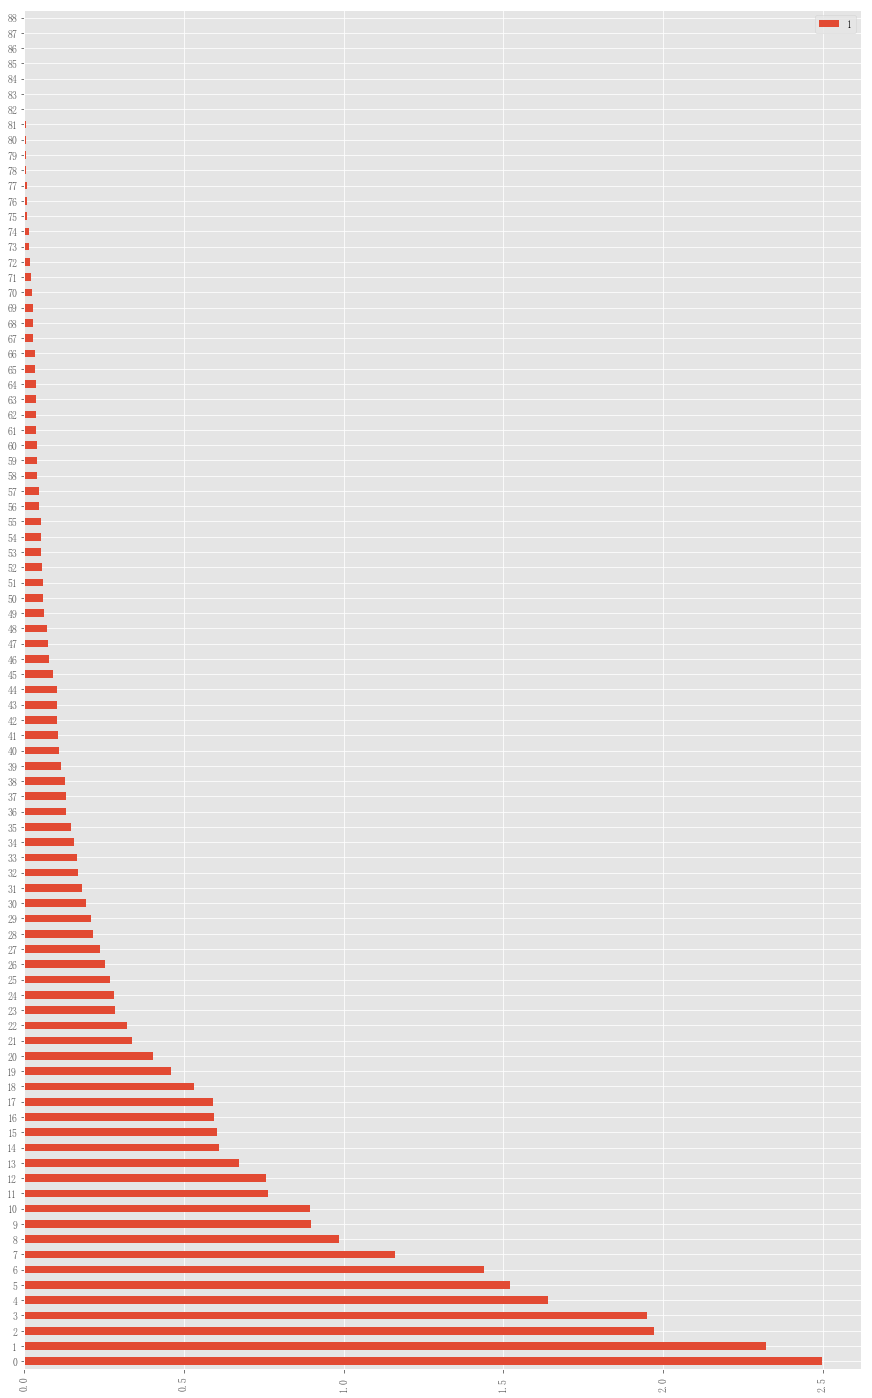

In [89]:
iv.plot(kind = 'barh', figsize =(15,25))
plt.xticks(rotation = 90)

In [90]:
iv_one = iv[iv.iloc[:,1] > 0.1]
iv_one_five = iv_one[iv_one.iloc[:,1] < 0.5]
iv_cols = iv_one_five.iloc[:,0].tolist()
print('原数据特征数{}, 通过IV值筛选后的特征数{}, 剔除了{:.2%}的特征'\
      .format(data.shape[1], len(iv_cols), (data.shape[1]-len(iv_cols))/data.shape[1]))

原数据特征数90, 通过IV值筛选后的特征数26, 剔除了71.11%的特征


#### 随机森林

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:

forset = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)# 等于-1的时候，表示cpu里的所有core进行工作或者直接填写cpu数
forset.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [93]:
# 2)输出重要特征
importances = forset.feature_importances_
indices = np.argsort(importances)[::-1]
feature_labels = data.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_labels[indices[f]], importances[indices[f]]))

 1) history_fail_fee               0.054404
 2) trans_fail_top_count_enum_last_6_month 0.046051
 3) loans_score                    0.036971
 4) apply_score                    0.030811
 5) latest_one_month_fail          0.029377
 6) loans_overdue_count            0.025277
 7) avg_consume_less_12_valid_month 0.017136
 8) max_consume_count_later_6_month 0.017001
 9) latest_query_day               0.016434
10) is_high_user                   0.015623
11) loans_latest_day               0.015384
12) historical_trans_day           0.015191
13) first_transaction_day          0.015145
14) top_trans_count_last_1_month   0.015080
15) avg_price_top_last_12_valid_month 0.014817
16) trans_activity_month           0.014737
17) consfin_avg_limit              0.014733
18) loans_avg_limit                0.014290
19) history_suc_fee                0.013921
20) consume_mini_time_last_1_month 0.013908
21) transd_mcc                     0.013854
22) rank_trad_1_month              0.013794
23) jewelry_consume

In [94]:
FI_RF = pd.DataFrame({"Feature Importance":forset.feature_importances_}, index=X_train.columns)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 <a list of 7 Text xticklabel objects>)

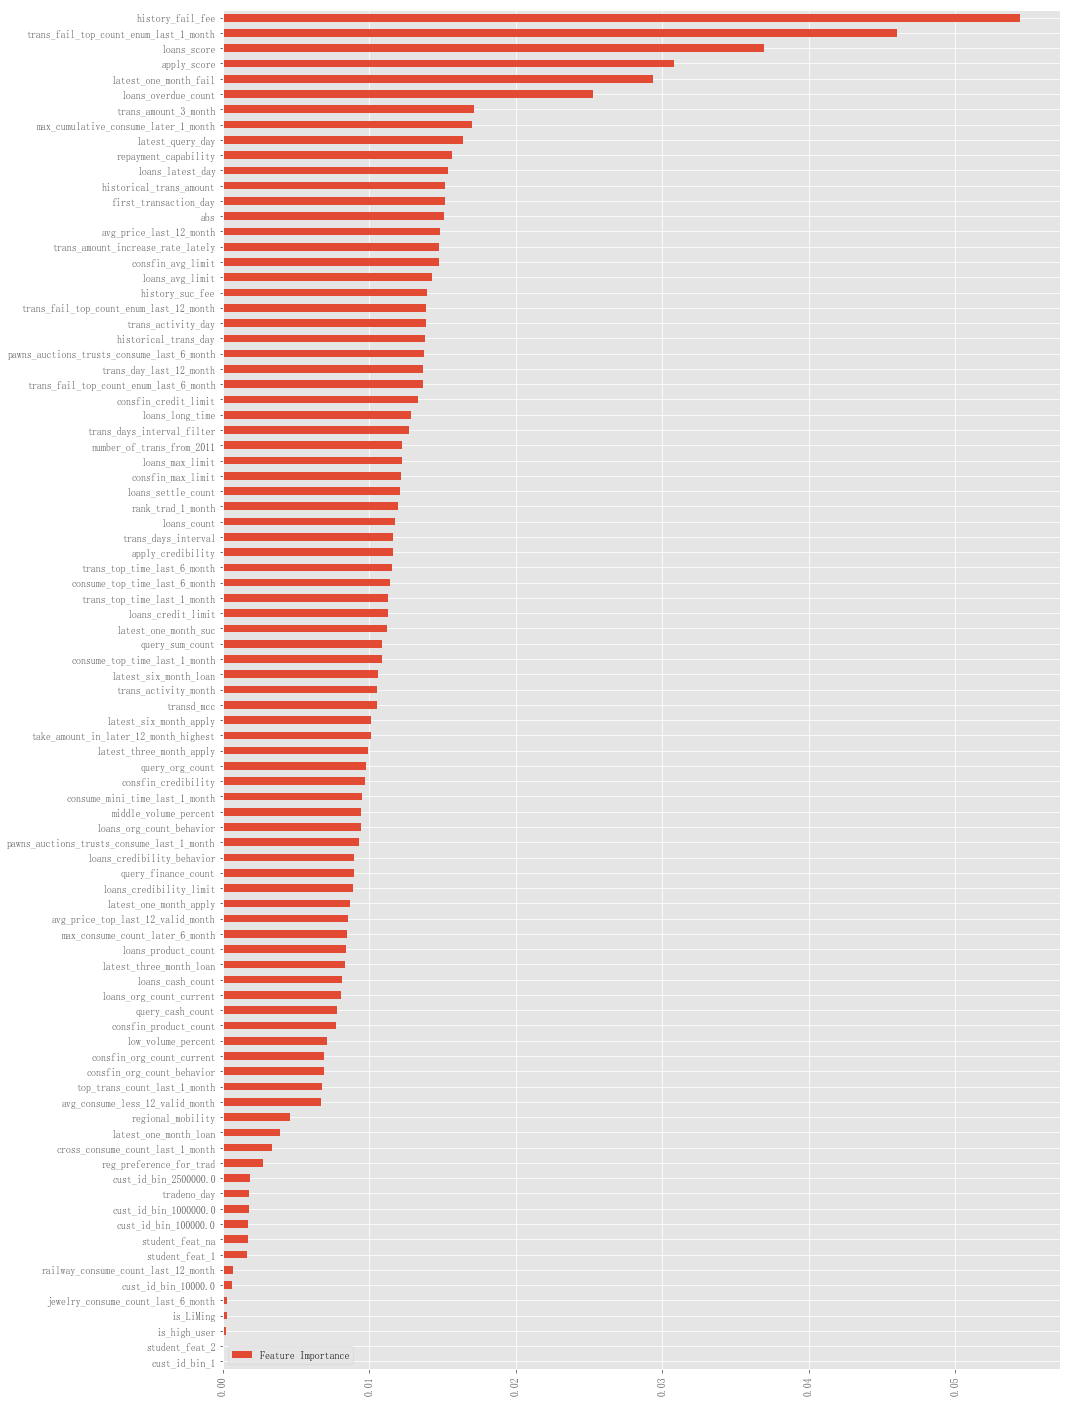

In [95]:
FI_RF.sort_values('Feature Importance').plot(kind = 'barh', figsize =(15,25))
plt.xticks(rotation = 90)

In [96]:
# 3)筛选重要特征
threshold = 0.01
x_selected = X_train.loc[:, importances > threshold]
print('原数据特征数{}, 通过随机森林筛选后的特征数{}, 剔除了{:.2%}的特征'\
      .format(data.shape[1], x_selected.shape[1], (data.shape[1]-x_selected.shape[1])/data.shape[1]))

原数据特征数90, 通过随机森林筛选后的特征数48, 剔除了46.67%的特征


In [97]:
#--------------------到此为止 下面需要做一个特征工程

### 模型构建：逻辑回归、svm和决策树、随机森林和XGBoost

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# 数据归一化
from sklearn.preprocessing import minmax_scale
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)

In [99]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

predict_proba 预测的概率像一个softmax  
descision_function 函数值，函数的最终取值可以理解为到平面的距离，到线的距离

In [101]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

svc = SVC(kernel='linear',probability=True)
svc.fit(X_train,y_train)

DT = DecisionTreeClassifier(max_depth=6)
DT.fit(X_train,y_train)

RF = RandomForestClassifier()
RF.fit(X_train,y_train)

XGB = XGBClassifier()
XGB.fit(X_train,y_train)

models = [LR,svc,DT,RF,XGB]

In [102]:
names = ["LR","SVC", 'DT', "RF","Xgb"]
evaluates = ['accuracy','precision','recall','f1','auc']

In [104]:
df_list = []
for name,model in zip(names,models):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #accuracy
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    #precision   
    train_precision = precision_score(y_train,y_train_pred)
    test_precision = precision_score(y_test,y_test_pred)   
    #recall
    train_recall = recall_score(y_train,y_train_pred)
    test_recall = recall_score(y_test,y_test_pred)   
    #f1
    train_f1 = f1_score(y_train,y_train_pred)
    test_f1 = f1_score(y_test,y_test_pred)   
    #auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
    #预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
    #根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]
    
    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)
    print('{}  训练集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,train_accuracy,train_precision,train_recall,train_f1,train_auc))
    print('{}  测试集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,test_accuracy,test_precision,test_recall,test_f1,test_auc))
    print('\n')
    df = pd.DataFrame(np.array([train_accuracy,train_precision,train_recall,train_f1,train_auc,test_accuracy,test_precision,test_recall,test_f1,test_auc]).reshape(2,-1),
                  index = ['train','test'],
                  columns = ['Accuracy','Precision','Recall','F1-Score','AUC-Score'])
    df_list.append(df)

pd.concat(df_list,axis=0,keys=names)

LR  训练集： accuracy:0.805,precision:0.75, recall:0.331, f1:0.459, auc:0.815
LR  测试集： accuracy:0.788,precision:0.629, recall:0.387, f1:0.479, auc:0.782


SVC  训练集： accuracy:0.8,precision:0.786, recall:0.278, f1:0.411, auc:0.824
SVC  测试集： accuracy:0.779,precision:0.662, recall:0.251, f1:0.364, auc:0.786


DT  训练集： accuracy:0.835,precision:0.763, recall:0.498, f1:0.602, auc:0.85
DT  测试集： accuracy:0.755,precision:0.52, recall:0.329, f1:0.403, auc:0.681


RF  训练集： accuracy:0.979,precision:0.997, recall:0.918, f1:0.956, auc:0.999
RF  测试集： accuracy:0.753,precision:0.514, recall:0.354, f1:0.419, auc:0.715


Xgb  训练集： accuracy:0.861,precision:0.866, recall:0.526, f1:0.655, auc:0.923
Xgb  测试集： accuracy:0.78,precision:0.597, recall:0.387, f1:0.47, auc:0.778




Accuracy  Precision    Recall  F1-Score  AUC-Score
LR  train  0.804629   0.750000  0.330935  0.459235   0.815470
    test   0.788367   0.628959  0.387187  0.479310   0.781916
SVC train  0.800120   0.786441  0.278177  0.410983   0.823580
    test   0.779257   0.661765  0.250696  0.363636   0.786437
DT  train  0.835287   0.762868  0.497602  0.602322   0.849661
    test   0.754730   0.519824  0.328691  0.402730   0.681349
RF  train  0.978960   0.997396  0.918465  0.956305   0.999371
    test   0.753329   0.514170  0.353760  0.419142   0.715128
Xgb train  0.860836   0.865878  0.526379  0.654735   0.923412
    test   0.779958   0.596567  0.387187  0.469595   0.778379

In [ ]:
#为什么SVC的roc曲线会这么异常。用经典的数据集试试。灵敏性  特异性  
# 将SVC换成了 linear的核 结果变得超级慢。 感觉很难收敛，增加了归一化后好多了。但是也很慢
#发现个问题，把训练过程写出去，之后不再从新训练 

In [110]:
def draw_roc_curve(train_pre_proba,test_pre_proba,train_auc,test_auc,model_name):
    fpr,tpr,roc_auc = train_pre_proba
    test_fpr,test_tpr,test_roc_auc = test_pre_proba
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' %test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc example '+ model_name)
    plt.legend(loc="lower right")
    plt.show()

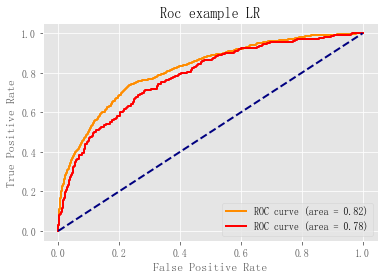

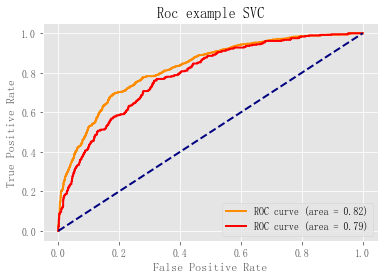

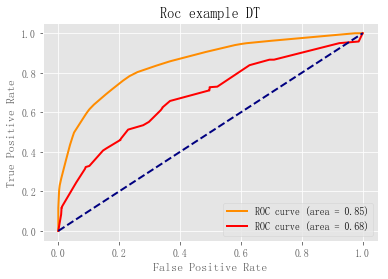

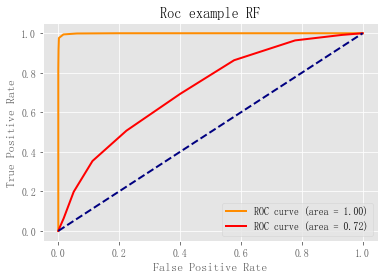

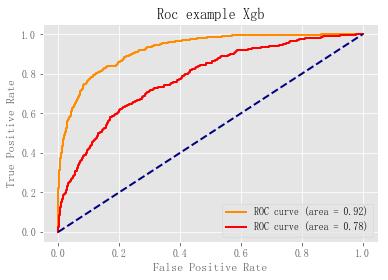

In [111]:
for name,model in zip(names,models):
    
    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]


    train_roc = roc_curve(y_train,y_train_pred)
    test_roc = roc_curve(y_test,y_test_pred)

    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)
    

    draw_roc_curve(train_roc,test_roc,train_auc,test_auc,name)


结论: 随机森林明显过拟合。XGB也过拟合。  
      ROC曲线只能针对2分类，针对多分类，需要设置成2分类形式

收获: 1 学习了如何运用不同的评分方法  
      2 SVM算法，必须进行归一化，不然会造成无法收敛或者很奇怪的ROC曲线  
      3 predict_proba 预测的概率，像一个softmax，对descision_function进行加工得到概率  
        descision_function 函数值，函数的最终取值可以理解为到平面的距离，到线的距离  
        
References:  
[使用5种分类模型进行用户贷款逾期预测](http://yezuolin.com/2018/11/TheModelofUserLoanOverdueEvaluation/)



In [ ]:
# 查看逾期与不逾期的比例
target_col = 'status'
labels = ['due','overdue']
due = data.loc[(data[target_col] == 0)].shape[0] #  (data[target_col] == 0).sum()
overdue = data.loc[(data[target_col] == 1)].shape[0]
x = [due,overdue] 

plt.figure(figsize=(8,6))
explode = [0, 0.1] # 0.1 凸出这部分，
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
plt.pie(x,labels =labels,autopct='%1.2f%%',explode=explode,shadow=True)

In [ ]:
x = data.drop('status',axis=1)
y = data.status
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state =2018,shuffle = True,stratify = y) 
#shuffle 跟random_state是什么关系？ 只有shuffle为真时，random_state才会起作用,而且此时，无法进行分层stratified。
# shuffle为True,即按照random_state状态进行shuffle.分层是严格按照30%比例进行，不分层的话因为是随机数进行shuffle，所以是在30%上下浮动

In [ ]:
#y_train[y_train == 1].size,y_test[y_test == 1].size ,y_train[y_train == 0].size,y_test[y_test == 0].size
X_train.shape[0], X_test.shape[0], y_train.size, y_test.size